# EDA 

## Imports

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays

sns.set_theme(style='whitegrid')


## Importing Data and External Data

### Main Data

In [161]:
train_df = pd.read_parquet("data/train.parquet")

### External Data:

We wish to add data about the weather, holidays and also COVID as we believe these features will have a substantial impact on our prediction

### Extra Data - Weather

https://meteo.data.gouv.fr/datasets/donnees-climatologiques-de-base-horaires/

We choose this data and not the one provided as this one is already in an hourly form.

Furthermore we will only be interested by specific features in this dataset

In [162]:
weather_df = pd.read_csv(
    "external_data/H_75_previous-2020-2022.csv.gz",
    parse_dates=["AAAAMMJJHH"],
    date_format="%Y%m%d%H",
    compression="gzip",
    sep=";",
).rename(columns={"AAAAMMJJHH": "date"})

### Extra Data - School Holidays

https://www.data.gouv.fr/fr/datasets/vacances-scolaires-par-zones/

We use this dataset to obtain the school holidays in Paris by looking at the "vacances_zone_c" column, for the bank holidays we use the holidays library 

In [163]:
school_hols_df = pd.read_csv("external_data/holidays.csv")

### Extra Data - COVID lockdown

https://fr.wikipedia.org/wiki/Confinements_li%C3%A9s_%C3%A0_la_pand%C3%A9mie_de_Covid-19_en_France

Gives us the dates of the different lockdowns 

In [164]:
lockdown_periods = [
    ('2020-03-18', '2020-05-10'),
    ('2020-10-31', '2020-12-14'),
    ('2021-04-04', '2021-05-02')
]

## Basic exploration of the main data and the weather data

### Main data

In [165]:
train_df.head(10)

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.609438
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,2.302585
48336,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2.0,2020-09-01 20:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.098612
48339,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 23:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48342,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-02 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48345,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,3.0,2020-09-02 11:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.386294
48348,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,5.0,2020-09-02 13:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.791759


In [166]:
train_df.tail(10)

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count
929160,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,294.0,2021-09-08 07:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.83977,2.30198,5.686975
929163,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,128.0,2021-09-08 14:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.83977,2.30198,4.859812
929166,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,329.0,2021-09-08 16:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.83977,2.30198,5.799093
929169,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,4.0,2021-09-09 01:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.83977,2.30198,1.609438
929172,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,22.0,2021-09-09 04:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.83977,2.30198,3.135494
929175,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,445.0,2021-09-09 06:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.83977,2.30198,6.100319
929178,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,145.0,2021-09-09 10:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.83977,2.30198,4.983607
929181,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,218.0,2021-09-09 15:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.83977,2.30198,5.389072
929184,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,21.0,2021-09-09 22:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.83977,2.30198,3.091042
929187,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,15.0,2021-09-09 23:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.83977,2.30198,2.772589


In [167]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 48321 to 929187
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  int64         
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[us]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64  

In [168]:
train_df.shape

(496827, 12)

### Weather Data

In [169]:
weather_df.head(10)

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,date,RR1,QRR1,DRR1,QDRR1,...,INS,QINS,INS2,QINS2,TLAGON,QTLAGON,TVEGETAUX,QTVEGETAUX,ECOULEMENT,QECOULEMENT
0,75106001,LUXEMBOURG,48.844667,2.333833,46,2020-01-01 00:00:00,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,75106001,LUXEMBOURG,48.844667,2.333833,46,2020-01-01 01:00:00,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,75106001,LUXEMBOURG,48.844667,2.333833,46,2020-01-01 02:00:00,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75106001,LUXEMBOURG,48.844667,2.333833,46,2020-01-01 03:00:00,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75106001,LUXEMBOURG,48.844667,2.333833,46,2020-01-01 04:00:00,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,75106001,LUXEMBOURG,48.844667,2.333833,46,2020-01-01 05:00:00,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,75106001,LUXEMBOURG,48.844667,2.333833,46,2020-01-01 06:00:00,0.2,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,75106001,LUXEMBOURG,48.844667,2.333833,46,2020-01-01 07:00:00,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,75106001,LUXEMBOURG,48.844667,2.333833,46,2020-01-01 08:00:00,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,75106001,LUXEMBOURG,48.844667,2.333833,46,2020-01-01 09:00:00,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
weather_df.shape

(156599, 204)

In [171]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156599 entries, 0 to 156598
Columns: 204 entries, NUM_POSTE to QECOULEMENT
dtypes: datetime64[ns](1), float64(200), int64(2), object(1)
memory usage: 243.7+ MB


By looking at the documentation of this dataset, we can choose the features that are interesting to us, furthermore for simplification we will only be looking at one of the different "poste" as the difference between them is not so big as having major weather differences. To decide which one to use we look at the one with least NaNs if there is an important difference with the number.

The features that we are interested by are:

-RR1: Amount of precipitation fallen in 1 hour (in mm and tenths)

-DRR1: Duration of precipitation (in minutes)

-FF: Wind strength averaged over 10 minutes

-T: Instantaneous sheltered temperature (in °C and tenths)

-TCHAUSSEE: Surface temperature measured on grass or asphalt (in °C and tenths)

-U: Relative humidity (in %)

-GLO: 	Hourly global radiation in UTC (in J/cm²)

In [172]:
# List of features you want to keep
selected_features = ['NUM_POSTE', 'date', 'RR1', 'DRR1', 'FF', 'T', 'TCHAUSSEE', 'U', 'GLO']

# Subset the DataFrame to only these columns
weather_df = weather_df[selected_features]

In [173]:
weather_df.head(10)

,NUM_POSTE,date,RR1,DRR1,FF,T,TCHAUSSEE,U,GLO
0,75106001,2020-01-01 00:00:00,0.0,NaN,NaN,1.6,NaN,NaN,NaN
1,75106001,2020-01-01 01:00:00,0.0,NaN,NaN,0.9,NaN,NaN,NaN
2,75106001,2020-01-01 02:00:00,0.0,NaN,NaN,0.1,NaN,NaN,NaN
3,75106001,2020-01-01 03:00:00,0.0,NaN,NaN,0.2,NaN,NaN,NaN
4,75106001,2020-01-01 04:00:00,0.0,NaN,NaN,0.6,NaN,NaN,NaN
5,75106001,2020-01-01 05:00:00,0.0,NaN,NaN,0.9,NaN,NaN,NaN
6,75106001,2020-01-01 06:00:00,0.2,NaN,NaN,1.2,NaN,NaN,NaN
7,75106001,2020-01-01 07:00:00,0.0,NaN,NaN,1.0,NaN,NaN,NaN
8,75106001,2020-01-01 08:00:00,0.0,NaN,NaN,1.2,NaN,NaN,NaN
9,75106001,2020-01-01 09:00:00,0.0,NaN,NaN,1.6,NaN,NaN,NaN


In [174]:
# Count total missing values per NUM_POSTE
na_count_per_station = weather_df.groupby('NUM_POSTE').apply(lambda g: g.isna().sum().sum())

# Sort the results
na_count_per_station = na_count_per_station.sort_values()

print(na_count_per_station.head())  # print the top few to see which has the least NA

NUM_POSTE
75114001        96
75116008     26723
75107005    125536
75110001    131616
75106001    131619
dtype: int64


/var/folders/s8/8f1md78s4zv39nkzq83679lm0000gn/T/ipykernel_5291/4147061251.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  na_count_per_station = weather_df.groupby('NUM_POSTE').apply(lambda g: g.isna().sum().sum())


NUM_POSTE 75114001 clearly is the best choice

In [175]:
weather_df = weather_df[weather_df['NUM_POSTE'] == 75114001]
weather_df.drop('NUM_POSTE', axis=1, inplace=True)
weather_df.head(10)

,date,RR1,DRR1,FF,T,TCHAUSSEE,U,GLO
77687,2020-01-01 00:00:00,0.0,0.0,1.5,0.8,-3.6,94.0,0.0
77688,2020-01-01 01:00:00,0.0,0.0,2.6,-0.7,-3.6,96.0,0.0
77689,2020-01-01 02:00:00,0.0,0.0,1.9,-0.3,-1.5,98.0,0.0
77690,2020-01-01 03:00:00,0.0,0.0,1.8,0.0,-0.4,98.0,0.0
77691,2020-01-01 04:00:00,0.0,0.0,2.2,0.3,-0.1,98.0,0.0
77692,2020-01-01 05:00:00,0.0,0.0,1.1,0.5,0.1,98.0,0.0
77693,2020-01-01 06:00:00,0.0,0.0,1.6,0.7,0.2,98.0,0.0
77694,2020-01-01 07:00:00,0.0,0.0,3.2,0.8,0.3,98.0,0.0
77695,2020-01-01 08:00:00,0.0,0.0,3.0,1.0,0.5,98.0,0.0
77696,2020-01-01 09:00:00,0.0,0.0,3.0,1.4,1.0,99.0,2.0


As there only a small number of NaNs, we will use time-based interpolation to fill the missing values

In [176]:
weather_df.set_index('date', inplace=True)
weather_df = weather_df.interpolate(method='time')
weather_df.reset_index(inplace=True)

In [177]:
nan_counts = weather_df.isna().sum()
print(nan_counts)


date         0
RR1          0
DRR1         0
FF           0
T            0
TCHAUSSEE    0
U            0
GLO          0
dtype: int64


## Merging the main data with the weather, the holidays and COVID lockdowns 

In [178]:
def prepare_and_merge_data(train_df, weather_df, school_hols_df):
    # Convert date columns to datetime
    train_df['date'] = pd.to_datetime(train_df['date'])
    weather_df['date'] = pd.to_datetime(weather_df['date'])
    school_hols_df['date'] = pd.to_datetime(school_hols_df['date'])

    # Convert boolean vacations to int (True -> 1, False -> 0)
    school_hols_df['vacances_zone_c'] = school_hols_df['vacances_zone_c'].astype(int)

    # Add bank holidays
    fr_holidays = holidays.France()
    train_df['is_bank_holiday'] = train_df['date'].dt.date.apply(
        lambda d: 1 if d in fr_holidays else 0
    )

    # Define lockdown periods
    lockdown_periods = [
        ('2020-03-18', '2020-05-10'),
        ('2020-10-31', '2020-12-14'),
        ('2021-04-04', '2021-05-02')
    ]

    def in_lockdown(dt):
        d_str = dt.strftime('%Y-%m-%d')
        return 1 if any(start <= d_str <= end for start, end in lockdown_periods) else 0

    train_df['is_lockdown'] = train_df['date'].apply(in_lockdown)

    # Merge school holidays (daily data) into the hourly train data
    train_df['date_only'] = train_df['date'].dt.floor('D')
    train_df = train_df.merge(
        school_hols_df[['date', 'vacances_zone_c']],
        left_on='date_only',
        right_on='date',
        how='left'
    )

    train_df.rename(columns={'vacances_zone_c': 'school_holidays'}, inplace=True)

    # Clean up after merge
    train_df.drop(columns=['date_only', 'date_y'], inplace=True)
    train_df.rename(columns={'date_x': 'date'}, inplace=True)

    # Merge weather data
    merged_df = pd.merge(train_df, weather_df, on='date', how='left')

    return merged_df

In [179]:
final_df = prepare_and_merge_data(train_df, weather_df, school_hols_df)
final_df.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,...,is_bank_holiday,is_lockdown,school_holidays,RR1,DRR1,FF,T,TCHAUSSEE,U,GLO
0,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,0,0,0,0.0,0.0,1.0,13.0,8.2,79.0,0.0
1,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,0,0,0,0.0,0.0,1.3,12.9,7.7,81.0,0.0
2,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,0,0,0,0.0,0.0,1.6,12.4,7.6,83.0,0.0
3,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,0,0,0,0.0,0.0,3.9,19.8,21.8,46.0,92.0
4,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,0,0,0,0.0,0.0,3.3,18.9,16.6,46.0,23.0


## EDA 

In [181]:
final_df.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,...,is_bank_holiday,is_lockdown,school_holidays,RR1,DRR1,FF,T,TCHAUSSEE,U,GLO
0,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,0,0,0,0.0,0.0,1.0,13.0,8.2,79.0,0.0
1,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,0,0,0,0.0,0.0,1.3,12.9,7.7,81.0,0.0
2,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,0,0,0,0.0,0.0,1.6,12.4,7.6,83.0,0.0
3,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,0,0,0,0.0,0.0,3.9,19.8,21.8,46.0,92.0
4,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,0,0,0,0.0,0.0,3.3,18.9,16.6,46.0,23.0


In [ ]:
final_df.info()
print(final_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496827 entries, 0 to 496826
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  int64         
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[us]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64 

In [182]:
final_df.describe()

,site_id,bike_count,date,counter_installation_date,latitude,longitude,log_bike_count,is_bank_holiday,is_lockdown,school_holidays,RR1,DRR1,FF,T,TCHAUSSEE,U,GLO
count,4.968270e+05,496827.000000,496827,496827,496827.000000,496827.000000,496827.000000,496827.000000,496827.000000,496827.000000,496827.000000,496827.000000,496827.000000,496827.000000,496827.000000,496827.000000,496827.000000
mean,1.053450e+08,60.191475,2021-03-08 07:25:59.668858,2019-04-04 07:24:35.245911,48.854343,2.345479,3.079917,0.029564,0.196322,0.339180,0.086290,5.085323,3.138136,12.935912,12.059724,69.999312,48.856646
min,1.000070e+08,0.000000,2020-09-01 01:00:00,2013-01-18 00:00:00,48.826360,2.265420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.300000,-7.100000,19.000000,0.000000
25%,1.000475e+08,5.000000,2020-12-05 22:00:00,2018-11-29 00:00:00,48.840801,2.314440,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,2.100000,7.900000,5.500000,59.000000,0.000000
50%,1.000562e+08,29.000000,2021-03-08 11:00:00,2019-11-06 00:00:00,48.852090,2.353870,3.401197,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,12.600000,11.500000,73.000000,0.000000
75%,1.000563e+08,79.000000,2021-06-09 14:00:00,2019-12-11 00:00:00,48.864610,2.375870,4.382027,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,17.900000,17.500000,83.000000,74.000000
max,3.000147e+08,1302.000000,2021-09-09 23:00:00,2020-11-29 00:00:00,48.891720,2.409690,7.172425,1.000000,1.000000,1.000000,22.100000,60.000000,11.300000,34.100000,50.200000,98.000000,338.000000
std,3.210346e+07,87.590566,NaN,NaN,0.018554,0.038026,1.659899,0.169380,0.397215,0.473432,0.513871,14.396102,1.403083,6.854357,8.802998,15.946141,77.100248


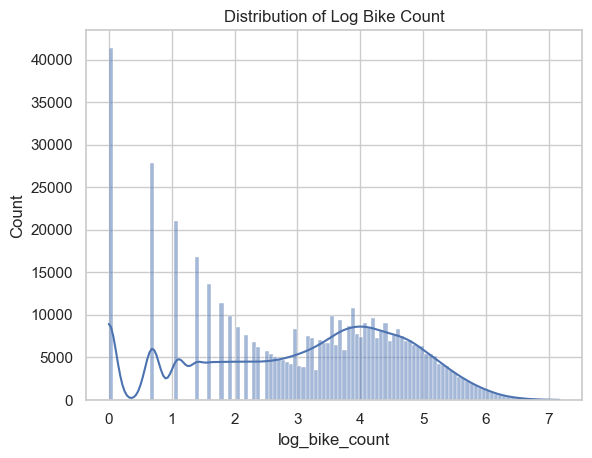

In [184]:
sns.histplot(final_df['log_bike_count'], kde=True)
plt.title('Distribution of Log Bike Count')
plt.show()

Hourly patterns 

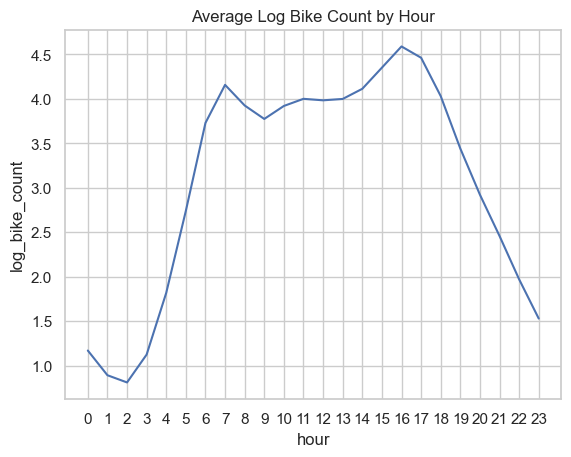

In [185]:
final_df['hour'] = final_df['date'].dt.hour
hourly_agg = final_df.groupby('hour')['log_bike_count'].mean().reset_index()

sns.lineplot(data=hourly_agg, x='hour', y='log_bike_count')
plt.title('Average Log Bike Count by Hour')
plt.xticks(range(0, 24))
plt.show()

Daily/Weekly Patterns:

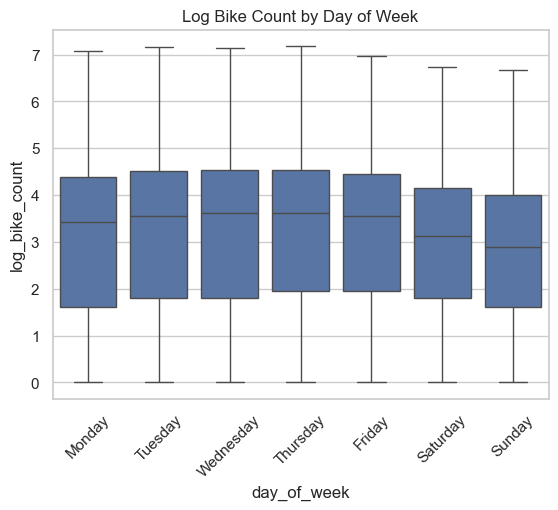

In [ ]:
final_df['day_of_week'] = final_df['date'].dt.day_name()
sns.boxplot(
    x='day_of_week',
    y='log_bike_count',
    data=final_df,
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
plt.title('Log Bike Count by Day of Week')
plt.xticks(rotation=45)
plt.show()

### External Factors

Bank holidays

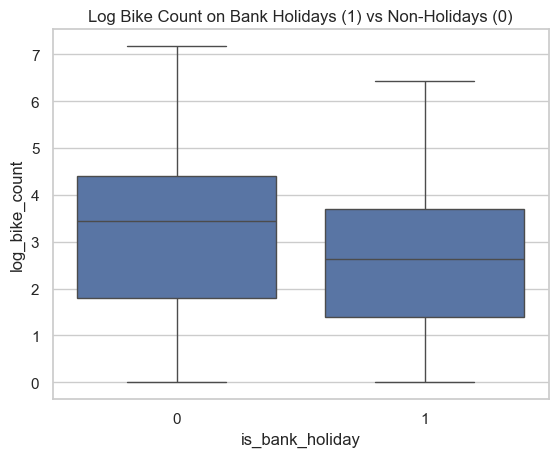

In [187]:
sns.boxplot(x='is_bank_holiday', y='log_bike_count', data=final_df)
plt.title('Log Bike Count on Bank Holidays (1) vs Non-Holidays (0)')
plt.show()

School holidays

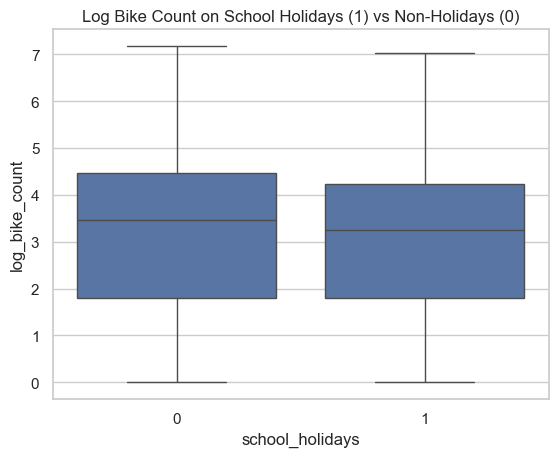

In [188]:
sns.boxplot(x='school_holidays', y='log_bike_count', data=final_df)
plt.title('Log Bike Count on School Holidays (1) vs Non-Holidays (0)')
plt.show()

Lockdowns

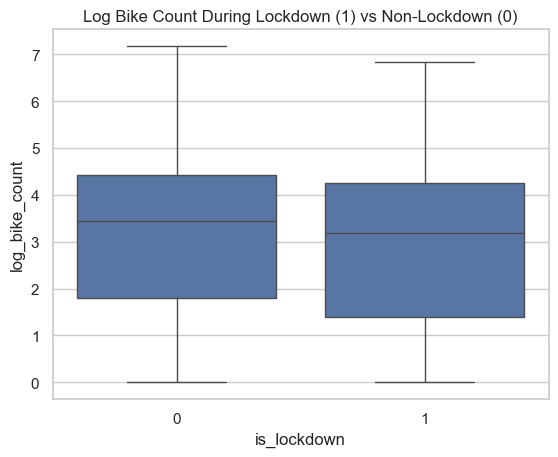

In [189]:
sns.boxplot(x='is_lockdown', y='log_bike_count', data=final_df)
plt.title('Log Bike Count During Lockdown (1) vs Non-Lockdown (0)')
plt.show()

### Weather features

Pairwise relationships

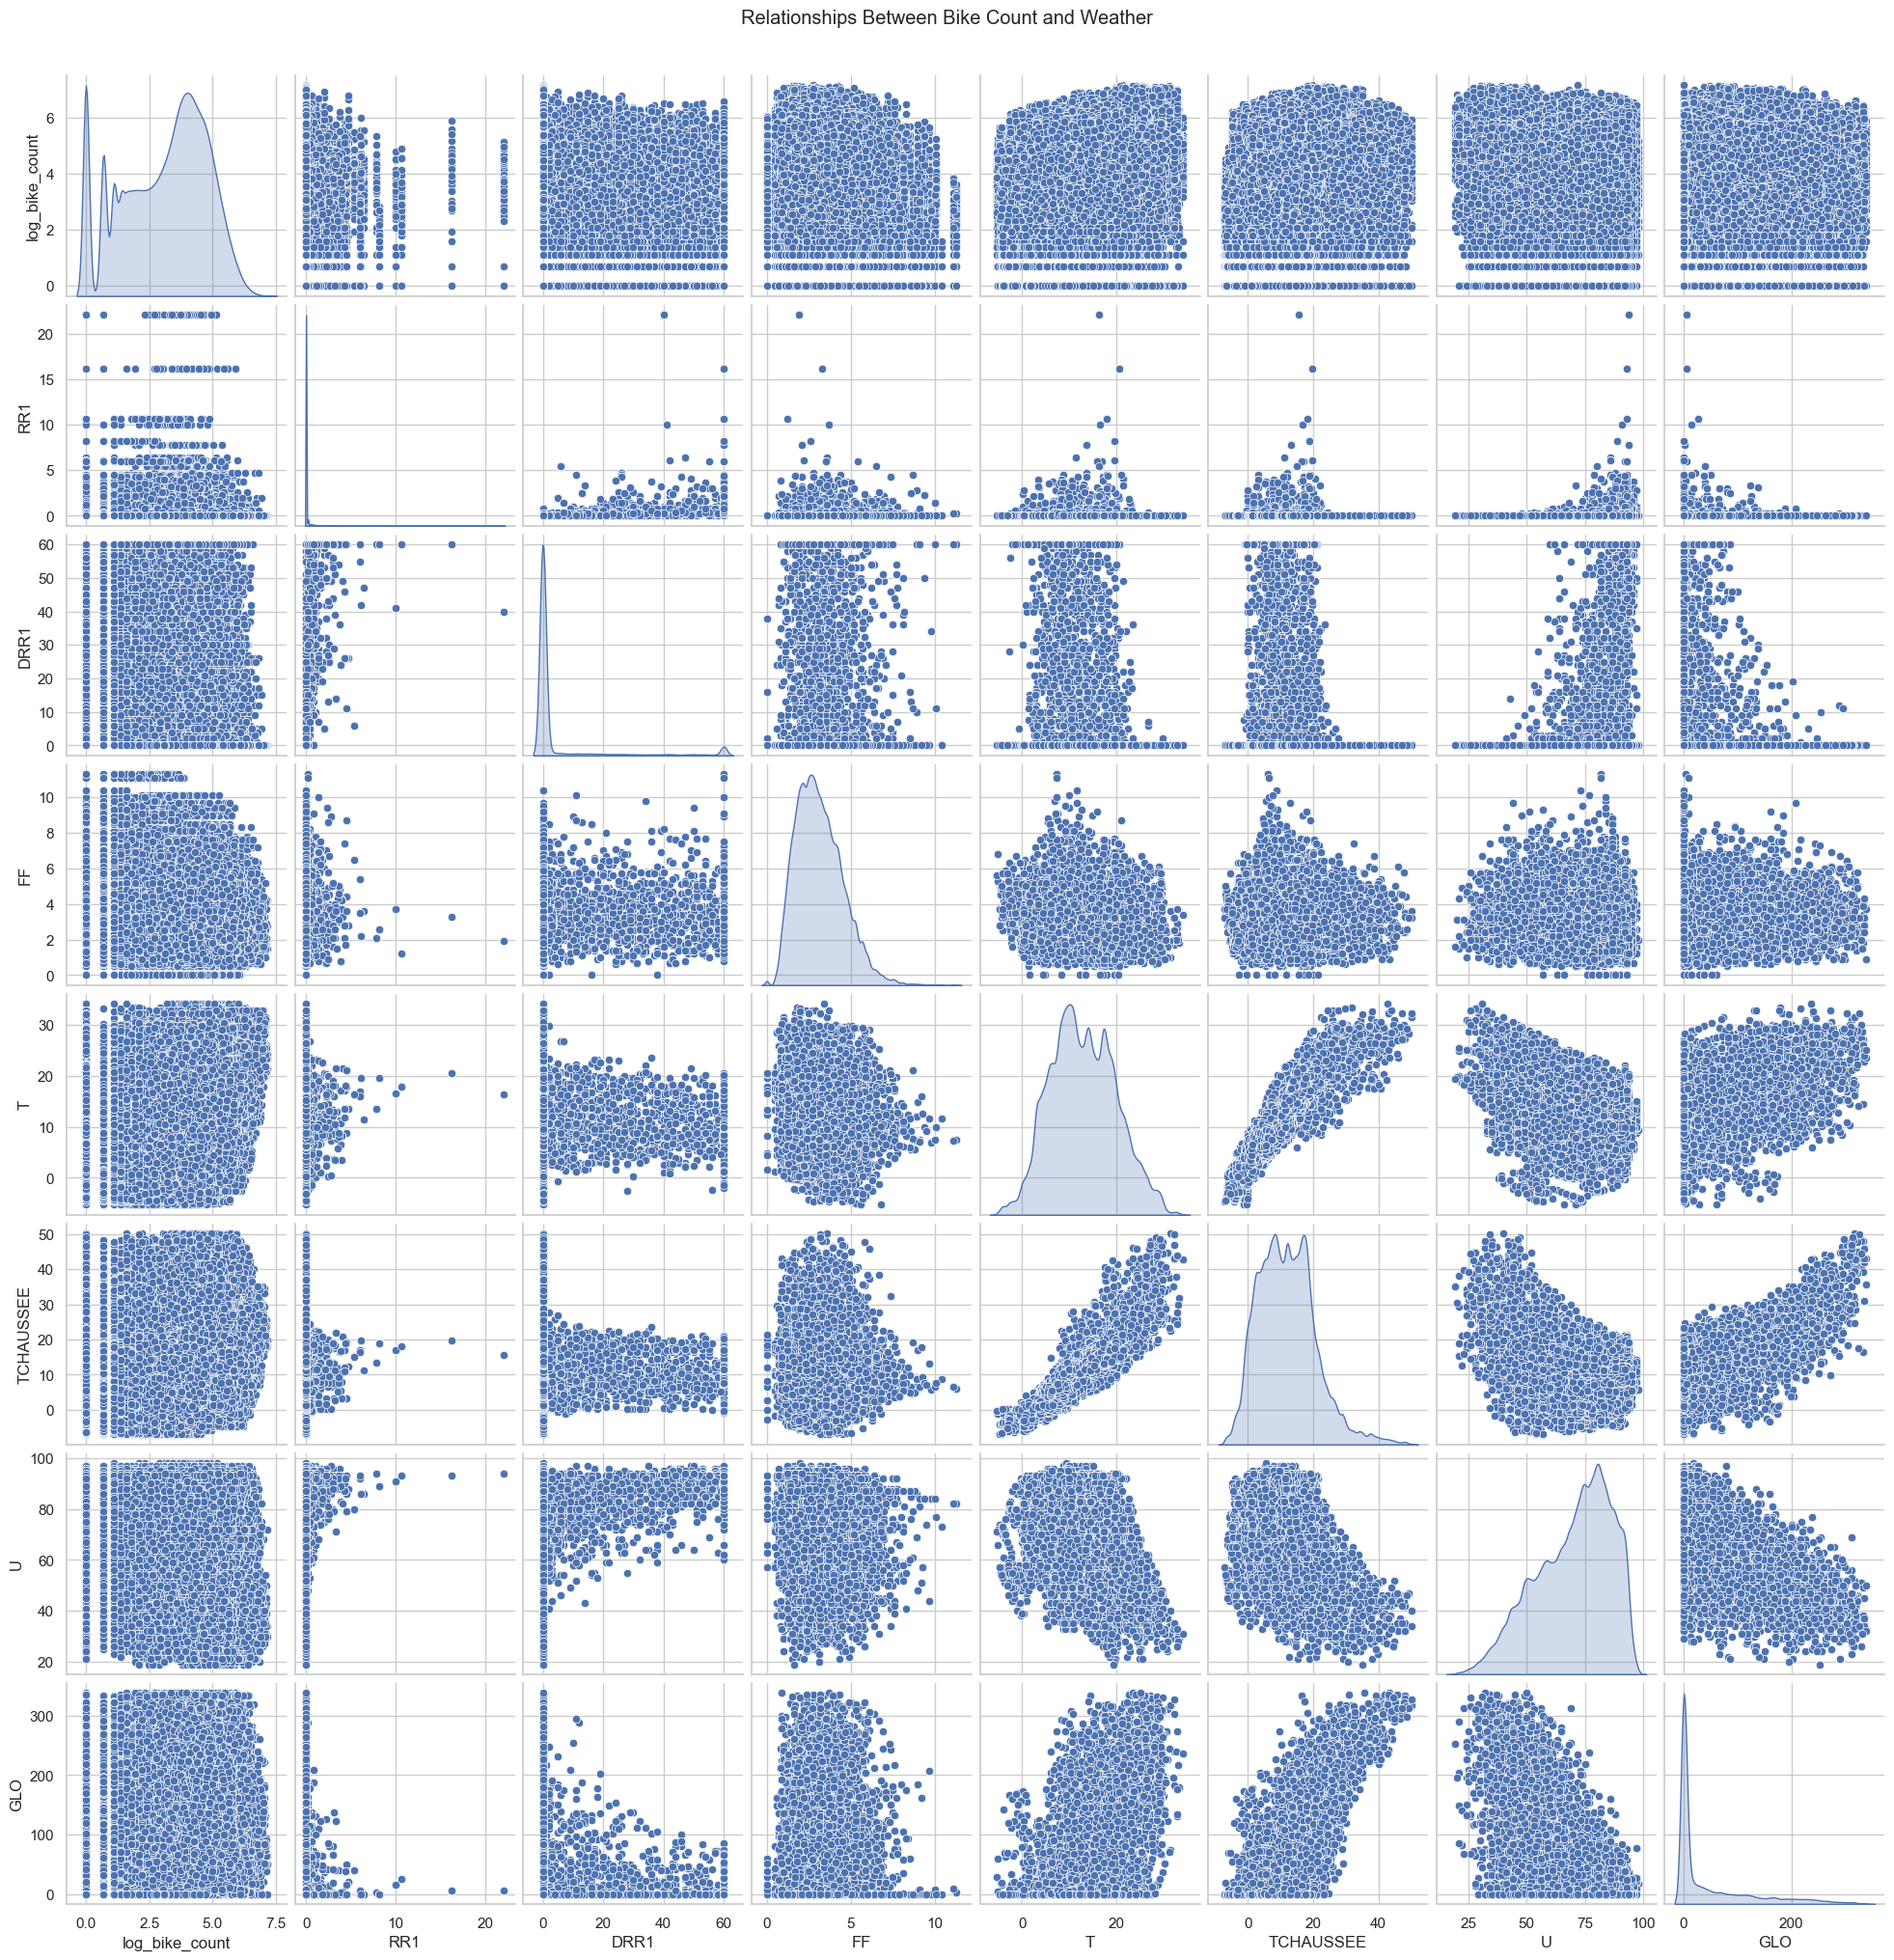

In [190]:
weather_cols = ['RR1', 'DRR1', 'FF', 'T', 'TCHAUSSEE', 'U', 'GLO']
sns.pairplot(final_df[['log_bike_count'] + weather_cols], diag_kind='kde')
plt.suptitle('Relationships Between Bike Count and Weather', y=1.02)
plt.show()

Correlation Heatmap

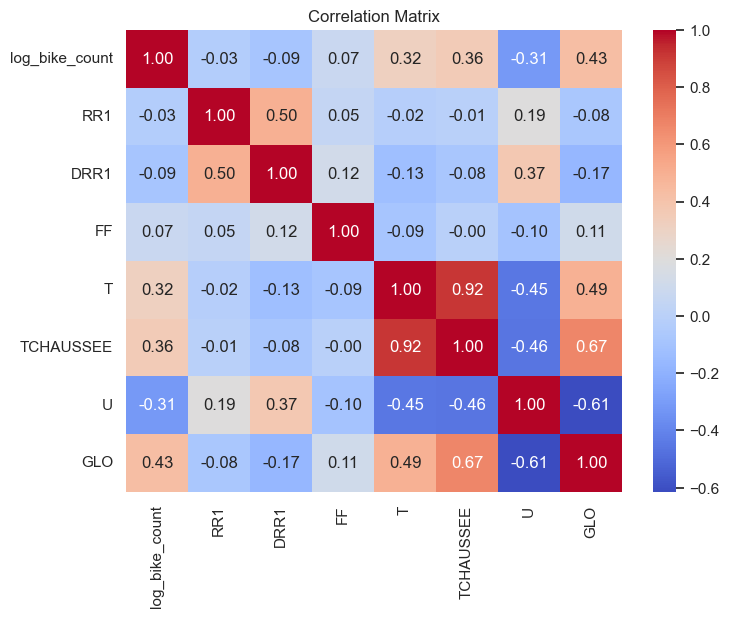

In [191]:
corr_cols = ['log_bike_count', 'RR1', 'DRR1', 'FF', 'T', 'TCHAUSSEE', 'U', 'GLO']
corr = final_df[corr_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Seasonal and Time trends

Monthly patterns

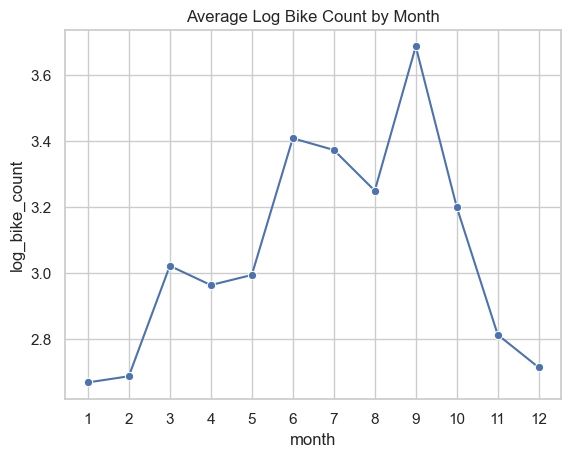

In [192]:
final_df['month'] = final_df['date'].dt.month
monthly_agg = final_df.groupby('month')['log_bike_count'].mean().reset_index()

sns.lineplot(x='month', y='log_bike_count', data=monthly_agg, marker='o')
plt.title('Average Log Bike Count by Month')
plt.xticks(range(1, 13))
plt.show()

Yearly comparison

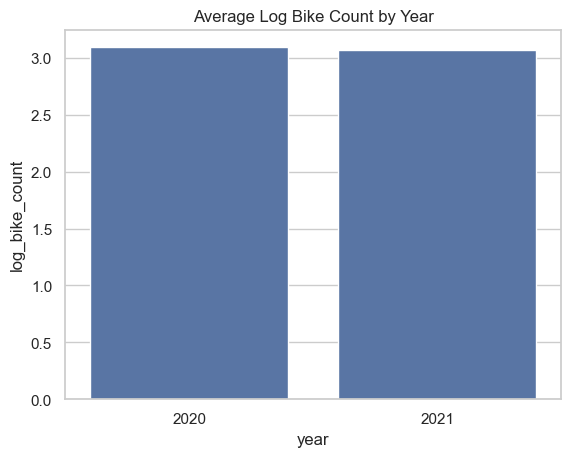

In [193]:
final_df['year'] = final_df['date'].dt.year
yearly_agg = final_df.groupby('year')['log_bike_count'].mean().reset_index()

sns.barplot(x='year', y='log_bike_count', data=yearly_agg)
plt.title('Average Log Bike Count by Year')
plt.show()